<a href="https://colab.research.google.com/github/pnp642001/Voice_of_Male_or_Female/blob/main/VOICE_OF_MALE_OR_FEMALE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PARTH NITESHKUMAR PATEL**

**PROJECT REGARDING WHETHER THE VOICE IS OF MALE OR FEMALE**

In [ ]:
#First, we will convert the .csv file into data_frame using pandas

import pandas as pd

df=pd.read_csv('voice.csv')
print(df.shape)

(3168, 21)


In [ ]:
#Creating a custom function for reducing the redundancy for the confusion matrix and classification report
def generate_cm_accuracy(y_test,y_pred):
  from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
  cm=confusion_matrix(y_test,y_pred)
  print(cm)
  print(classification_report(y_test,y_pred))
  print("ACCURACY OF MODEL : ",accuracy_score(y_test,y_pred))

In [ ]:
#FUNCTION FOR TRAINING AND TESTING SCORE

def train_test_score(model):
  print("Training Score: ",model.score(x_train,y_train))
  print("Testing Score: ",model.score(x_test,y_test))


In [ ]:
#DataFrame for the project

df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [ ]:
#Now, we will look for null or empty values in the columns
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

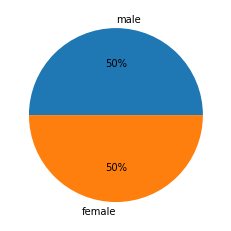

In [ ]:
#As there are no null values in any of the columns, we will proceed to the next step

# Now, we will depict the percentage distribution of the label in the form of the pie-chart

import matplotlib.pyplot as plt

number_of_males=0
number_of_females=0

for name in df['label']:
  if name=='male':
    number_of_males+=1
  else:
    number_of_females+=1

x=[number_of_males,number_of_females]
labels=['male','female']

pie_chart=plt.pie(x,labels=labels,autopct='%.0f%%')

In [ ]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [ ]:
#MODELS ONLY ACCEPT NUMERIC VALUES.
#HENCE, WE WILL CONVERT LABEL WHICH OF THE TYPE OBJECT INTO INT64

df['label'].replace('male',1,inplace=True)
df['label'].replace('female',0,inplace=True)

#NOW, 
#MALE -> 1
#FEMALE ->0

df

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0


In [ ]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label         int64
dtype: object

In [ ]:
#Number of records where label column has value MALE and FEMALE are same

#Now, we will split the given data into train and test data.
#Test size will be 20%

#Divding the data into dependent and independent categories.

x=df.drop('label',axis=1)
y=df['label']

print(type(x),type(y))
print(x.shape,y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(3168, 20) (3168,)


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
print(x_train.shape,y_train.shape)

(2534, 20) (2534,)


In [ ]:
#IMPORTING THE IMPORTANT LIBRARIES FOR THE MODELS:

# WE WILL USE THE FOLLOWING ALGORITHMS:
# a. Decision Tree Classifier
# b. Random Forest Classifier
# c. KNN Classifier
# d. Logistic Regression
# e. SVM Classifier

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from  sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#**DECISION TREE CLASSIFIER**

In [ ]:
model_1=DecisionTreeClassifier(criterion='gini',max_depth=6)
model_1.fit(x_train,y_train)



DecisionTreeClassifier(max_depth=6)

In [ ]:
train_test_score(model_1)

Training Score:  0.9936858721389108
Testing Score:  0.9605678233438486


In [ ]:
ypred_model_1=model_1.predict(x_test)
print(ypred_model_1)

[0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 0 0
 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0
 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1
 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 0
 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1
 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0
 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1
 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0
 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1
 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1
 0 0 1 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0
 0 0 1 1 1 1 1 0 0 1 0 1 

In [ ]:
generate_cm_accuracy(y_test,ypred_model_1)

[[294  12]
 [ 13 315]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       306
           1       0.96      0.96      0.96       328

    accuracy                           0.96       634
   macro avg       0.96      0.96      0.96       634
weighted avg       0.96      0.96      0.96       634

ACCURACY OF MODEL :  0.9605678233438486


#**RANDOM FOREST CLASSIFIER**

In [ ]:
model_2=RandomForestClassifier(n_estimators=28,criterion='gini',max_depth=6)
model_2.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, n_estimators=28)

In [ ]:
train_test_score(model_2)

Training Score:  0.9901341752170482
Testing Score:  0.9779179810725552


In [ ]:
ypred_model_2=model_2.predict(x_test)
print(ypred_model_2)

[0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0
 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0
 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1
 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0
 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 0 0 0 1 0 1
 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0
 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1
 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0
 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1
 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0
 0 0 1 0 1 1 1 0 0 1 0 1 

In [ ]:

print(generate_cm_accuracy(y_test,ypred_model_2))

[[297   9]
 [  5 323]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       306
           1       0.97      0.98      0.98       328

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

ACCURACY OF MODEL :  0.9779179810725552
None


#**KNN**

In [ ]:
model_3=KNeighborsClassifier(n_neighbors=50)
model_3.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=50)

In [ ]:
train_test_score(model_3)

Training Score:  0.6985003946329913
Testing Score:  0.7208201892744479


In [ ]:
ypred_model_3=model_3.predict(x_test)
print(ypred_model_3)

[1 1 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1
 0 0 0 1 1 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 0 0
 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1
 1 0 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 1 1 1 0
 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1
 1 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 1 1 0
 1 1 1 1 1 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 1
 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0
 1 0 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 0 1 1 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0
 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 0
 0 0 1 0 1 1 1 0 1 1 1 1 

In [ ]:
print(generate_cm_accuracy(y_test,ypred_model_3))

[[215  91]
 [ 86 242]]
              precision    recall  f1-score   support

           0       0.71      0.70      0.71       306
           1       0.73      0.74      0.73       328

    accuracy                           0.72       634
   macro avg       0.72      0.72      0.72       634
weighted avg       0.72      0.72      0.72       634

ACCURACY OF MODEL :  0.7208201892744479
None


#**LOGISTIC REGRESSION**

In [ ]:
model_4=RandomForestClassifier()
model_4.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
train_test_score(model_4)

Training Score:  1.0
Testing Score:  0.9779179810725552


In [ ]:
ypred_model_4=model_4.predict(x_test)
print(ypred_model_4)

[0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0
 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0
 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1
 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 1 0
 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 0 1
 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 1 1 1 0 1 0 0 0 1 0
 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1
 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0
 0 0 0 0 1 1 1 1 0 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1
 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0
 0 0 1 0 1 1 1 0 0 1 0 1 

In [ ]:
print(generate_cm_accuracy(y_test,ypred_model_4))

[[300   6]
 [  8 320]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       306
           1       0.98      0.98      0.98       328

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

ACCURACY OF MODEL :  0.9779179810725552
None


#**SVM**

In [ ]:
model_5=SVC(kernel='linear',C=3)
model_5.fit(x_train,y_train)

SVC(C=3, kernel='linear')

In [ ]:
train_test_score(model_5)

Training Score:  0.9676400947119179
Testing Score:  0.9716088328075709


In [ ]:
ypred_model_5=model_5.predict(x_test)
print(ypred_model_5)

[0 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 1 0 0
 0 1 0 1 1 1 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0
 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 0 0
 0 0 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1
 1 0 0 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0
 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 0 1 0 1
 0 0 0 1 1 1 1 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 1 0
 1 1 0 0 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1
 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0
 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1
 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0
 0 0 1 0 1 1 1 0 0 1 0 1 

In [ ]:
print(generate_cm_accuracy(y_test,ypred_model_5))

[[293  13]
 [  5 323]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       306
           1       0.96      0.98      0.97       328

    accuracy                           0.97       634
   macro avg       0.97      0.97      0.97       634
weighted avg       0.97      0.97      0.97       634

ACCURACY OF MODEL :  0.9716088328075709
None


#**MOST ACCURATE MODEL FOR THE GIVEN DATA-SET:**


* ACCURACY OF DECISION TREE CLASSIFIER : **97%**
* ACCURACY OF RANDOM FOREST CLASSIFIER : **98.4%**
* ACCURACY OF KNN CLASSIFIER : **66.4%**
* ACCURACY OF LOGISTIC REGRESSION : **98.7%**
* ACCURACY OF SVM CLASSIFIER : **97.4%**



---



* HERE, THE DATASET HAS EQUAL NUMBER OF MALES AND FEMALES AS VALUES IN LABEL 
COLUMN.

* AS A RESULT, PROBABILITY OF OVERFITTING EVEN IF ACCURACY IS HIGH CAN BE IGNORED.

* ACCORDING TO ME, EXCEPT FOR KNN, ALL MODELS ARE HAVING ACCURACY IN A CLOSE PROXIMITY.

* **HOWEVER, RANDOM FOREST AND LOGISTIC CAN BE USED AS BOTH HAVE ALMOST SAME ACURACY, BUT, LOGISTIC REGRESSION HAS TRAINING SCORE OF 1.0 WHICH SOMETIMES LEAD TO UNREALISTIC RESULTS.**

* AS A RESULT, FOR A SAME SIDE, I WILL GO WITH **RANDOM FOREST CLASSIFIER**


